In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


Question 1 (40 points): Create a function that takes as input the image file name and
the number of colors to find (clusters to find) and returns the updated image based on the
new clusters. (Note: Your function can also return other elements as needed for plotting.)
This function will use the scikit-learn KMeans function to find the cluster centers and which
pixels belong to which clusters. You will then create an updated image that replaces each pixel value with its corresponding cluster center value. Note that the scikit-learn cluster
centers may not be integers. You should convert the cluster centers to integers using floor().
We recommend setting the random state option in K-Means function to a fixed value for
repeatable results.

In [43]:
def clusterImage(image_file, k):
     #Read image
     image = cv2.imread(image_file)
     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
     
     #Convert image into arrays
     #image_array.shape[0] = height, shape[1] = width
     image_array = np.array(image) 
     pixel_array = np.reshape(image_array, (image_array.shape[0] * image_array.shape[1], 3))

     #Create clusters
     kmeans = KMeans(n_clusters=k, random_state=0)
     cluster_indices = kmeans.fit_predict(pixel_array)

     #Replace pixel value with cluster center value
     for i in range(len(cluster_indices)):
          pixel_array[i] = kmeans.cluster_centers_[cluster_indices[i]]

     new_image = np.reshape(pixel_array, image_array.shape)
     return new_image, cluster_indices, kmeans.cluster_centers_
    


Question 2 (40 points – 10 for each image): For each of the four images, try K=4, K=8,
and K=16 and visualize the updated image with the new colors based on the cluster centers.
You should include a 2x2 figure for each image that shows the original image and the three
updated images for the different values of K. Include a brief discussion of which images look
acceptable (capturing the details of the original image) and which ones do not. For those
that do not look acceptable, comment in the report on why they do not look acceptable
(based on which colors were selected as cluster centers).

In [44]:
images = ['./images/ayreshall.jpeg', './images/checkerneyland.jpeg', './images/minkao.jpeg', './images/smokey.jpeg']

for i in range(len(images)):
    figure = plt.figure()
    image0 = np.array(cv2.cvtColor(cv2.imread(images[i]), cv2.COLOR_BGR2RGB))
    image1, n, n1 = clusterImage(images[i], 4)
    image2, n, n1 = clusterImage(images[i], 8)
    image3, n, n1 = clusterImage(images[i], 16)

    figure.add_subplot(2, 2, 1)
    plt.axis('off')
    plt.imshow(image0)

    figure.add_subplot(2, 2, 2)
    plt.axis('off')
    plt.imshow(image1)

    figure.add_subplot(2, 2, 3)
    plt.axis('off')
    plt.imshow(image2)

    figure.add_subplot(2, 2, 4)
    plt.axis('off')
    plt.imshow(image3)

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

Question 3 (20 points – 5 for each image): For each image, create three histogram plots
(one for each value of K) showing the distribution of pixel values across the different cluster
centers (how many pixels in the image below to each cluster).

<Figure size 432x288 with 0 Axes>

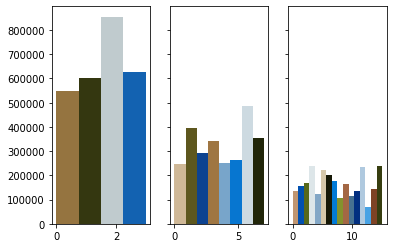

<Figure size 432x288 with 0 Axes>

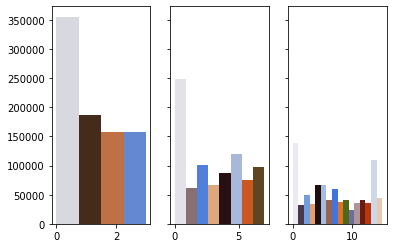

<Figure size 432x288 with 0 Axes>

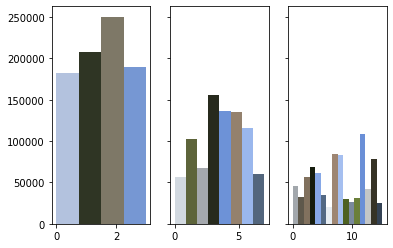

<Figure size 432x288 with 0 Axes>

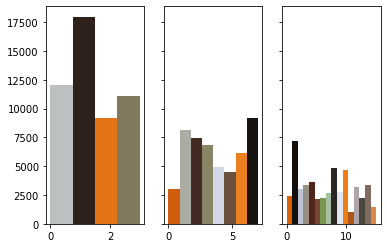

In [45]:
images = ['./images/ayreshall.jpeg', './images/checkerneyland.jpeg', './images/minkao.jpeg', './images/smokey.jpeg']

for i in range(len(images)):
    figure = plt.figure()
    fig, axes = plt.subplots(1, 3, sharey=True)
    plt.title = images[i]

    image1, histogram1, centers = clusterImage(images[i], 4)
    n, n1, clusterIndex = axes[0].hist(histogram1, 4)
    #Makes the histogram bars the colors of the clusters
    for j in range(len(clusterIndex)):
        clusterIndex[j].set_facecolor(centers[j]/256)

    image2, histogram2, centers = clusterImage(images[i], 8)
    n, n1, clusterIndex = axes[1].hist(histogram2, 8)
    for k in range(len(clusterIndex)):
        clusterIndex[k].set_facecolor(centers[k]/256)

    image3, histogram3, centers = clusterImage(images[i], 16)
    n, n1, clusterIndex = axes[2].hist(histogram3, 16)
    for m in range(len(clusterIndex)):
        clusterIndex[m].set_facecolor(centers[m]/256)
